In [81]:
######################################################################################
# Анализ данных уникальных пользователей личного кабинета образовательного приложения
######################################################################################


######################################################################################
# Описание данных в датасетах
#
# Таблица "Region.xlsx" - сводная таблица всех школ по регионам  
# Поля таблицы:
#    "Название региона",
#    "dispname" - название учебного заведения,
#    "school_id" - идентификационный номер учебного заведения,
#    "Сумма cnt" - сумма уникальных посещений личного кабинета,
#    "year_week" - календарный год и неделя.
#
# Таблица "MAS.xlsx" - "Monthly Active School" — количество 
# уникальных школ за месяц (с данными по всем школам 
# с 1 марта 2021 г. и до 1 апреля 2022 г.). 
# Поля таблицы:
#    "Месяц и год",
#    "Доля активных пользователей (в среднем по школам)",
#    "Кол-во активных школ".
#
# Таблица "DAU.xlsx" - "Daily Active User" — количество 
# уникальных пользователей за день (с данными по всем школам 
# с 1 марта 2021 г. и до 1 апреля 2022 г.). 
# Поля таблицы:
#    "Дата" - календарная дата в виде дд/мм/гггг,
#    "Пользователи" - количество пользователей,
#    "Тип пользователя",
#    "Stiky Factor" - метрика "Sticky Factor" характеризует 
#    заинтересованность, лояльность и степень вовлеченности 
#    пользователей системы.
#
# Таблица "WAU.xlsx" - "Weekly Active User" — количество 
# уникальных пользователей за неделю (с данными по всем школам 
# с 1 марта 2021 г. и до 1 апреля 2022 г.). 
# Поля таблицы:
#    "full date-diapason" - календарная дата в виде год_неделя,
#    "Пользователи" - количество пользователей,
#    "Тип пользователя".
#
# Таблица "MAU.xlsx" - "Monthly Active User" — количество 
# уникальных пользователей за день (с данными по всем школам 
# с 1 марта 2021 г. и до 1 апреля 2022 г.). 
# Поля таблицы:
#    "report_month" - календарная дата в виде дд/мм/гггг,
#    "Пользователи" - количество пользователей,
#    "Тип пользователя".
######################################################################################

In [82]:
# Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [83]:
# Чтение файлов XLSX с данными 

user_mas = pd.read_excel('MAS.xlsx')
user_mau = pd.read_excel('MAU.xlsx')
user_wau = pd.read_excel('WAU.xlsx')
user_dau = pd.read_excel('DAU.xlsx')
user_region = pd.read_excel('Region.xlsx')

In [84]:
# Выводим на экран полученный датафрейм "Region" (при необходимости переименуем названия столбцов для удобства вычисления) 
# и проверим считанные типы данных

user_region.rename(columns = {'Название региона':'region', 'dispname':'school_name', 'Сумма cnt':'sum_count', 'year_week':'date'}, inplace = True)
user_region.head()

,region,school_name,school_id,sum_count,date
0,г Москва,NaN,NaN,23017,2021_32
1,г Москва,NaN,NaN,18430,2021_39
2,г Москва,NaN,NaN,17916,2022_12
3,г Москва,NaN,NaN,15460,2022_11
4,г Москва,NaN,NaN,10941,2022_13


In [85]:
# Типы данных

user_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52864 entries, 0 to 52863
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region       52864 non-null  object
 1   school_name  52719 non-null  object
 2   school_id    52719 non-null  object
 3   sum_count    52864 non-null  int64 
 4   date         52864 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [86]:
# Размеры матрицы датафрейма "Region" (количество строк и столбцов)

user_region.shape

(52864, 5)

In [87]:
# Вычислим все описательные статистики нашей таблицы: count - количество элементов, mean - выборочное среднее, 
# std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

user_region.describe()

,sum_count
count,52864.000000
mean,16.818534
std,221.679884
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,23017.000000


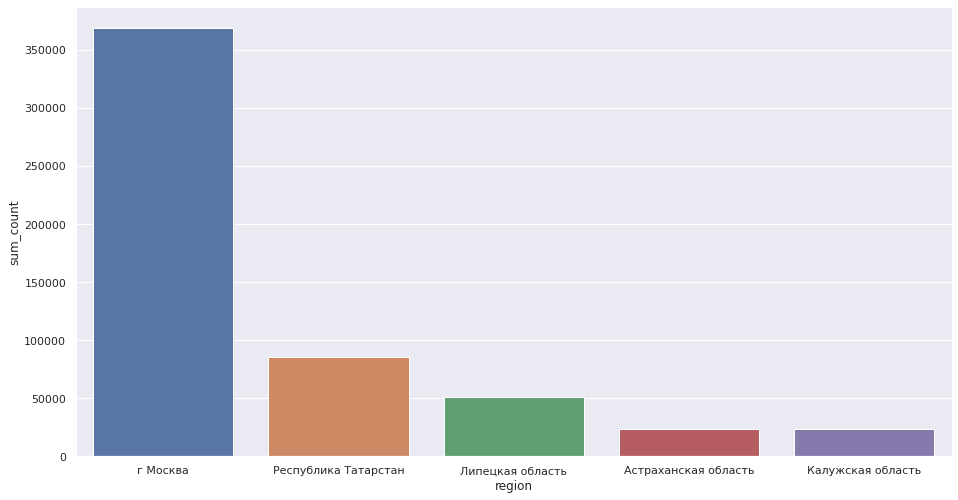

In [88]:
# Диаграмма распределения самых активных ТОП-5 регионов по суммарному количеству пользователей 

top_5_region_by_sum_count = user_region.groupby(['region']).sum().sort_values(by='sum_count', ascending=False).head(5).reset_index()
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x="region", y="sum_count", data=top_5_region_by_sum_count);

In [89]:
user_region.groupby(['region']).sum().sort_values(by='sum_count', ascending=False).head(10)

,sum_count
region,
г Москва,368746
Республика Татарстан,85685
Липецкая область,50760
Астраханская область,23527
Калужская область,23267
Тамбовская область,22511
Нижегородская область,19712
Красноярский край,19255
Свердловская область,17481


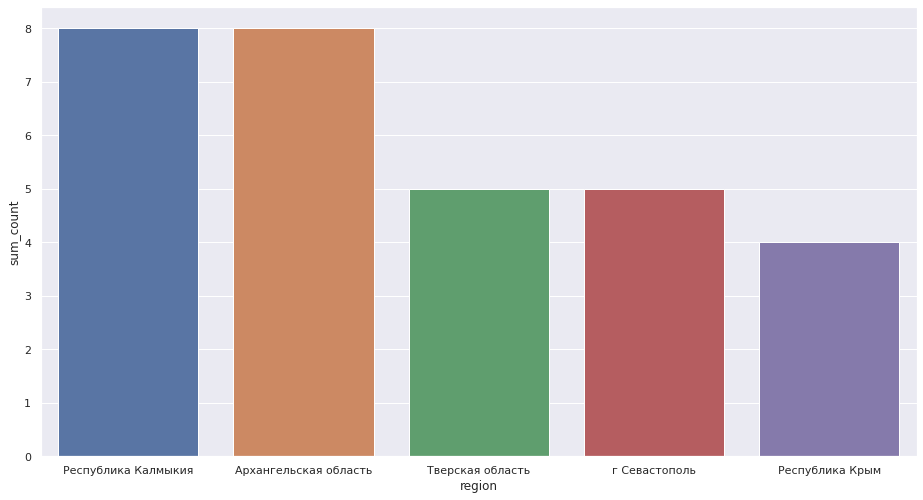

In [90]:
# Диаграмма распределения самых менее активных ТОП-5 регионов (с конца рейтинга) по суммарному количеству пользователей

tail_5_region_by_sum_count = user_region.groupby(['region']).sum().sort_values(by='sum_count', ascending=False).tail(5).reset_index()
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(x="region", y="sum_count", data=tail_5_region_by_sum_count);

In [91]:
user_region.groupby(['region']).sum().sort_values(by='sum_count', ascending=False).tail(10)

,sum_count
region,
Республика Карачаево-Черкесская,50
Республика Коми,32
Республика Ингушетия,31
Смоленская область,18
Республика Алтай,10
Республика Калмыкия,8
Архангельская область,8
Тверская область,5
г Севастополь,5


In [92]:
# Выводим на экран полученный датафрейм "MAS" (при необходимости переименуем названия столбцов для удобства вычисления) 
# и проверим считанные типы данных

user_mas.rename(columns = {'Месяц и год':'date', 'Доля активных пользователей (в среднем по школам)':'ratio_active_users', 'Кол-во активных школ':'number_active_schools'}, inplace = True)
user_mas.head()

,date,ratio_active_users,number_active_schools
0,2021_03 (Март),0.515373,1341
1,2021_04 (Апрель),0.662642,1756
2,2021_05 (Май),0.458083,1142
3,2021_06 (Июнь),0.221133,519
4,2021_07 (Июль),0.342809,808


In [93]:
# Типы данных

user_mas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   13 non-null     object 
 1   ratio_active_users     13 non-null     float64
 2   number_active_schools  13 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 440.0+ bytes


In [94]:
# Размеры матрицы датафрейма "MAS" (количество строк и столбцов)

user_mas.shape

(13, 3)

In [95]:
# Максимальные и минимальные значения по количеству активных школ в месяц с учетом доли активных пользователей
# за весь рассматриваемый период времени

user_mas.groupby('ratio_active_users').max().sort_values(by='number_active_schools', ascending=False)

,date,number_active_schools
ratio_active_users,,
0.785191,2021_09 (Сентябрь),2036
0.758098,2021_08 (Август),1849
0.662642,2021_04 (Апрель),1756
0.581743,2021_10 (Октябрь),1555
0.515373,2021_03 (Март),1341
0.458083,2021_05 (Май),1142
0.389752,2021_11 (Ноябрь),1004
0.358138,2021_12 (Декабрь),823
0.342809,2021_07 (Июль),808


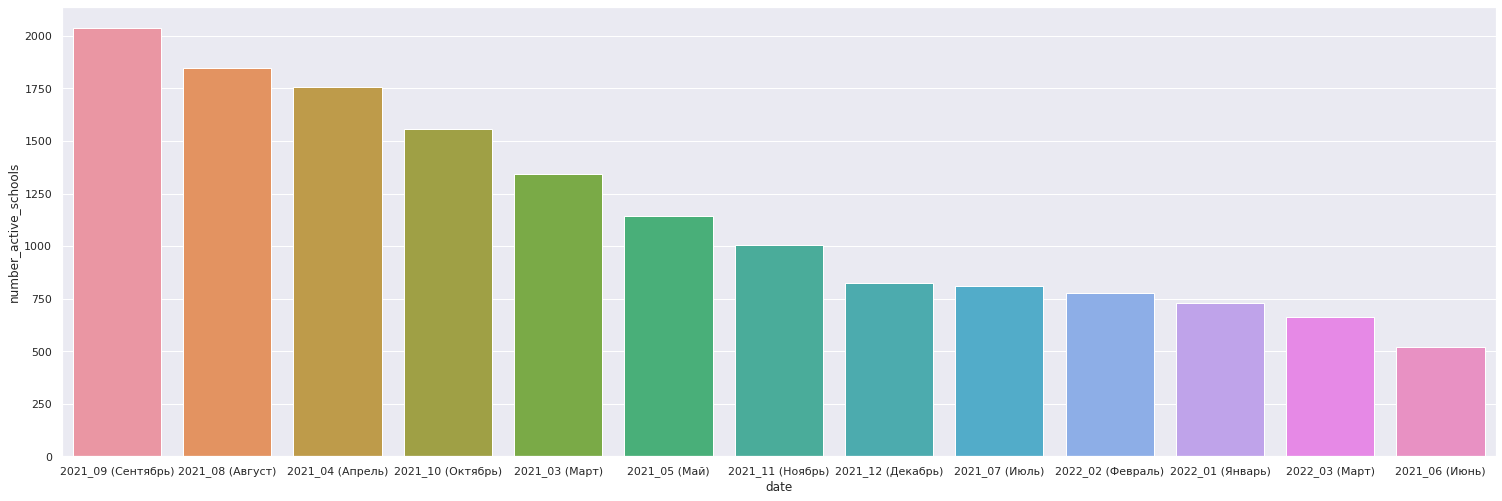

In [96]:
# Диаграмма распределения по сортировке количества самых активных школ по месяцам

sns.set(rc={'figure.figsize':(25.7,8.27)})
sns.barplot(x="date", y="number_active_schools", data=user_mas.sort_values(by='number_active_schools', ascending=False));

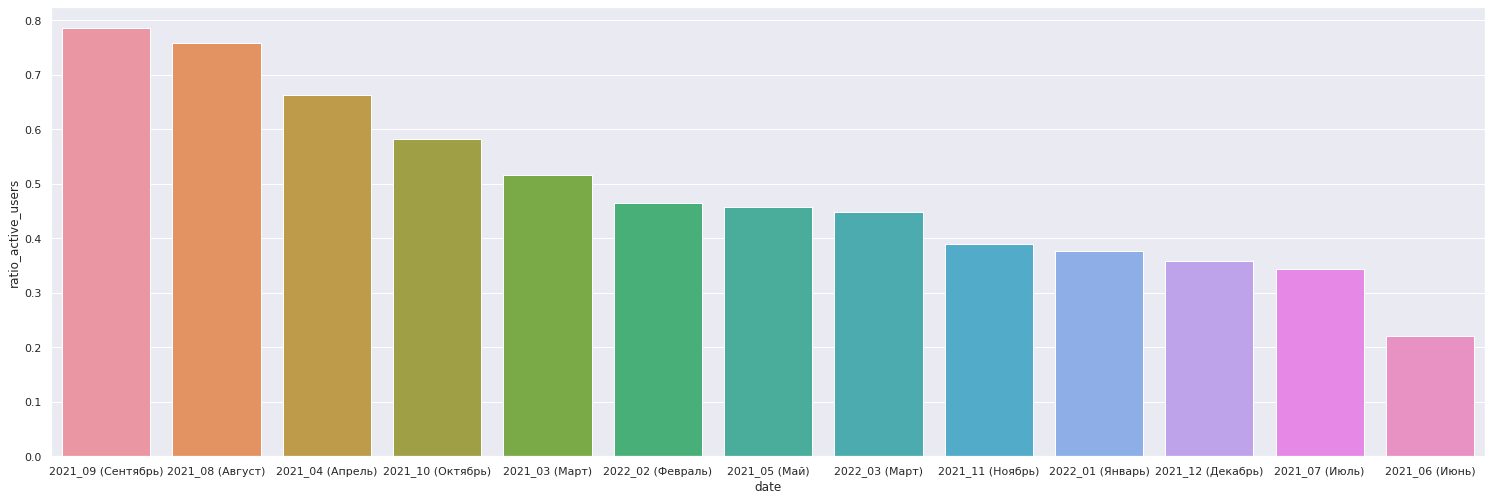

In [97]:
# Диаграмма распределения по сортировке доли самых активных пользователей по месяцам

sns.barplot(x="date", y="ratio_active_users", data=user_mas.sort_values(by='ratio_active_users', ascending=False));

In [98]:
# Вычислим все описательные статистики нашей таблицы: count - количество элементов, mean - выборочное среднее, 
# std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

user_mas.describe().round(3)

,ratio_active_users,number_active_schools
count,13.000,13.000
mean,0.489,1154.000
std,0.167,503.169
min,0.221,519.000
25%,0.377,776.000
50%,0.458,1004.000
75%,0.582,1555.000
max,0.785,2036.000


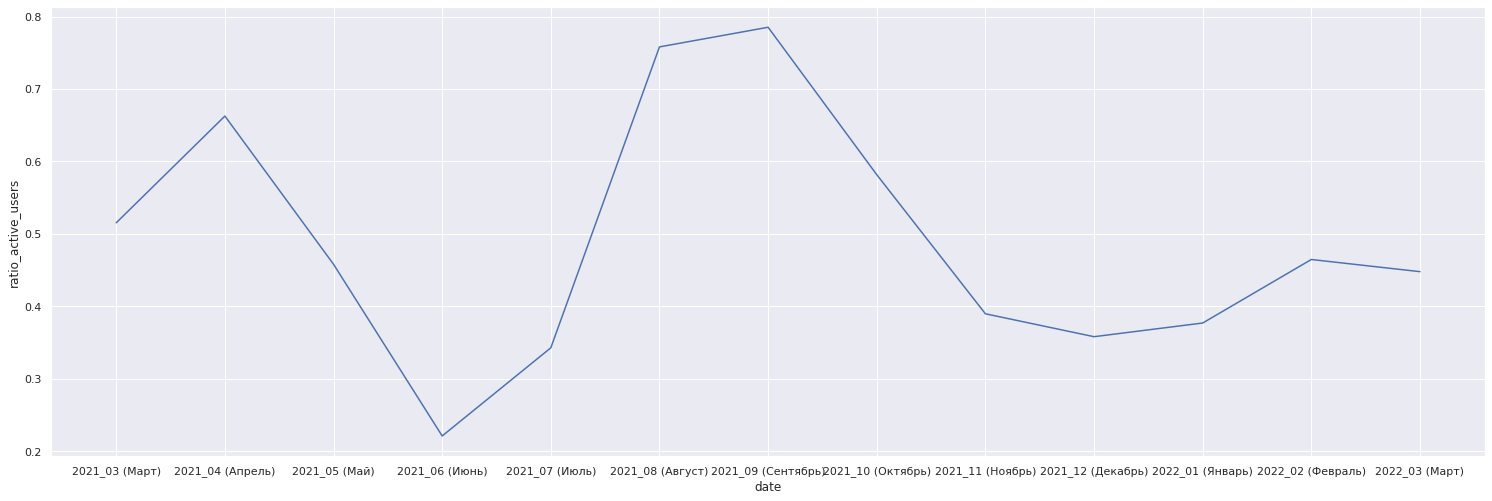

In [99]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# по показателю - "Доля активных пользователей (в среднем по школам)"

# В данном случае для обеих метрик - "Доля активных пользователей (в среднем по школам)" 
# и "Количество активных школ" мы видим, что минимум значений приходится на июнь месяц (начало школьных летних каникул), 
# а максимум - на сентябрь месяц (начало учебного школьного года)

sns.set(rc={'figure.figsize':(25.7,8.27)})
sns.lineplot(x="date", y="ratio_active_users", data=user_mas);

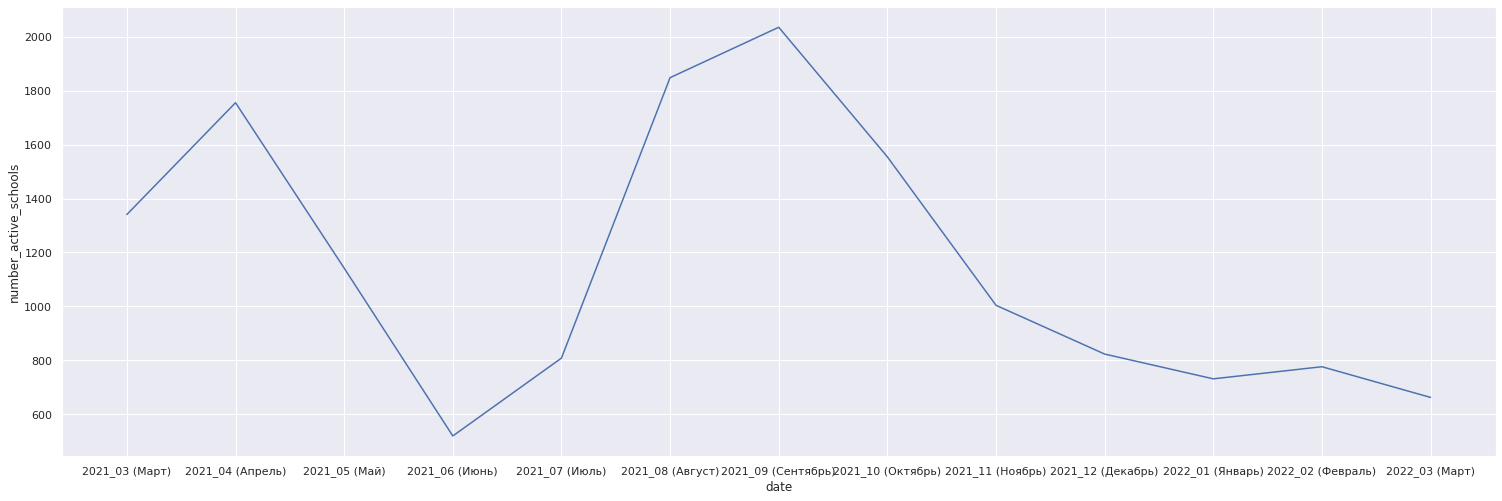

In [100]:
# Построим линейный график развития временной динамики (с данными по всем школам с 1 марта 2021 г. и до 1 апреля 2022 г.) 
# по показателю - "Количество активных школ"

sns.lineplot(x="date", y="number_active_schools", data=user_mas);

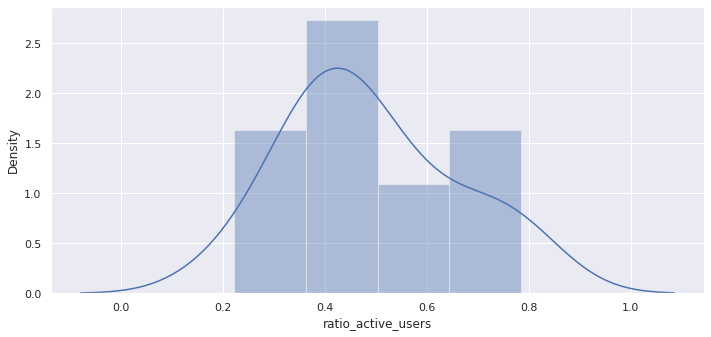

In [101]:
# Построим график плотности распределения по показателю - "Доля активных пользователей (в среднем по школам)"

# *Для справки: здесь, исходя из формы полученного распределения, можно с определенной степенью вероятности сказать, что такая метрика, 
# как "Доля активных пользователей (в среднем по школам)" - подчиняется нормальному закону распределения

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(user_mas.ratio_active_users);

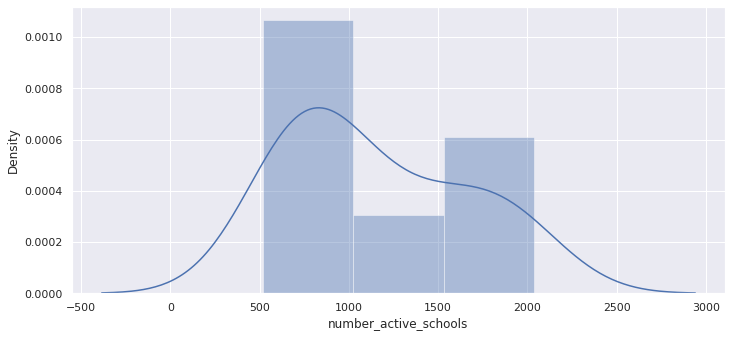

In [102]:
# Построим график плотности распределения по показателю - "Количество активных школ"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(user_mas.number_active_schools);

In [103]:
# Выводим на экран полученный датафрейм "DAU" (при необходимости переименуем названия столбцов для удобства вычисления) 
# и проверим считанные типы данных

user_dau.rename(columns={'Дата':'date', 'Пользователи':'users_count', 'Тип пользователя':'user_role', 'Stiky Factor':'sticky_factor'}, inplace=True)
user_dau.head()

,date,users_count,user_role,sticky_factor
0,2021-03-01,374,Конфигуратор системы,0.450060
1,2021-03-01,36,Родитель,0.571429
2,2021-03-01,5460,Ученик,0.362093
3,2021-03-01,1228,Учитель,0.382674
4,2021-03-02,370,Конфигуратор системы,0.445247


In [104]:
# Типы данных

user_dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1583 non-null   datetime64[ns]
 1   users_count    1583 non-null   int64         
 2   user_role      1583 non-null   object        
 3   sticky_factor  1575 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 49.6+ KB


In [105]:
# Размеры матрицы датафрейма "DAU" (количество строк и столбцов)

user_dau.shape

(1583, 4)

In [106]:
# Минимальные значения по типу пользователей в день за весь рассматриваемый период времени

user_dau.groupby(['user_role']).min('users_count')

,users_count,sticky_factor
user_role,,
Конфигуратор системы,14,0.048387
Родитель,1,0.041667
Ученик,139,0.058898
Учитель,39,0.052561


In [107]:
# Максимальные значения по типу пользователей в день за весь рассматриваемый период времени

user_dau.groupby(['user_role']).max('users_count')

,users_count,sticky_factor
user_role,,
Конфигуратор системы,628,1.125000
Родитель,72,0.933333
Ученик,14113,0.774466
Учитель,4070,0.845118


In [108]:
# Вычислим все описательные статистики нашей таблицы вне зависимости от типа пользователя: count - количество элементов, mean - выборочное среднее, 
# std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

user_dau.describe()

,users_count,sticky_factor
count,1583.000000,1575.000000
mean,1067.267214,0.337604
std,1644.467790,0.148120
min,1.000000,0.041667
25%,53.000000,0.216424
50%,321.000000,0.339757
75%,1224.500000,0.442294
max,14113.000000,1.125000


In [109]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Конфигуратор системы": count - количество элементов, mean - выборочное среднее, 
# std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

config_user_dau = user_dau.query('user_role == "Конфигуратор системы"')
config_user_dau.describe().round(3)

,users_count,sticky_factor
count,396.000,394.000
mean,212.793,0.353
std,117.695,0.158
min,14.000,0.048
25%,115.750,0.188
50%,201.000,0.396
75%,311.000,0.472
max,628.000,1.125


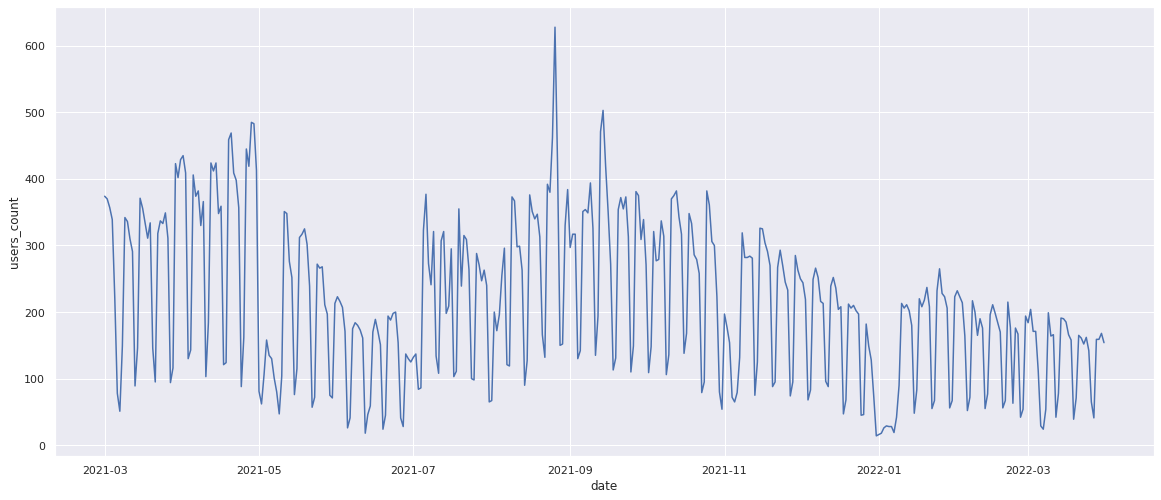

In [110]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Конфигуратор системы" по метрикам: количество пользователей - "users_count" и степени вовлеченности
# пользователя - "sticky_factor"

# Из графика видно, что наибольшее количество "Конфигураторов системы" - 628 человек наблюдалось перед началом 
# учебного года 26 августа 2021 года, а наименьшее - 14 человек в период зимних каникул - 31 декабря 2021 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=config_user_dau);

In [111]:
config_user_dau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role,sticky_factor
date,,,
2021-08-26,628,Конфигуратор системы,0.502802
2021-09-14,503,Конфигуратор системы,0.448707
2021-04-28,485,Конфигуратор системы,0.495403
2021-04-29,483,Конфигуратор системы,0.493361
2021-09-13,471,Конфигуратор системы,0.420161
...,...,...,...
2022-01-07,19,Конфигуратор системы,0.237500
2022-01-02,18,Конфигуратор системы,NaN
2021-06-12,18,Конфигуратор системы,0.048387


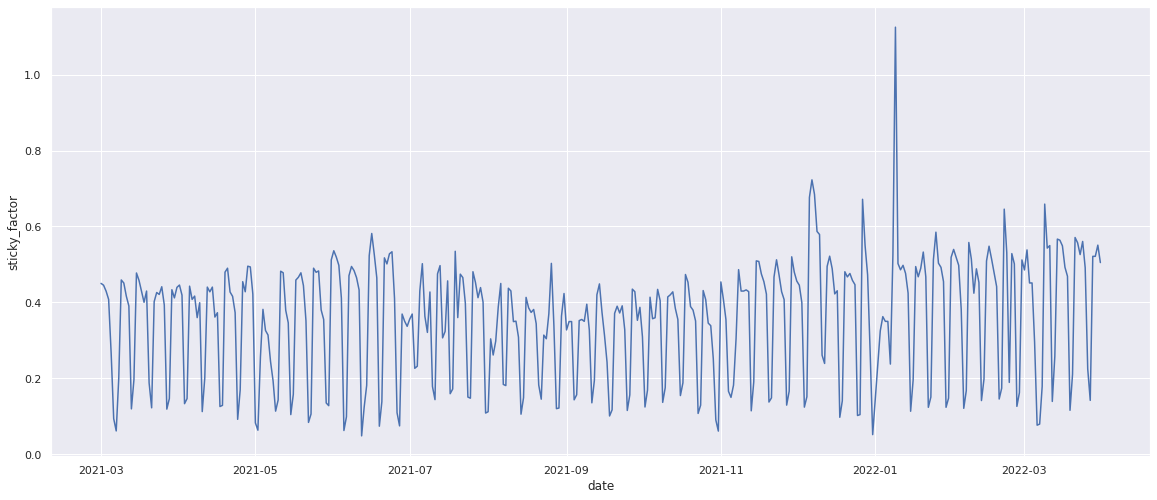

In [112]:
sns.lineplot(x="date", y="sticky_factor", data=config_user_dau);

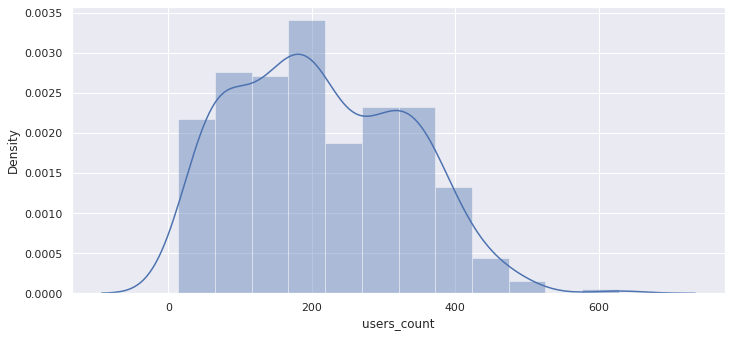

In [113]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(config_user_dau.users_count);

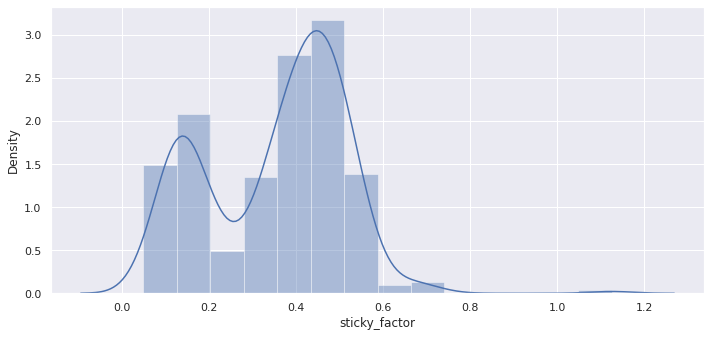

In [114]:
# Построим график плотности распределения по показателю степени вовлеченности пользователя - "sticky_factor"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(config_user_dau.sticky_factor);

In [115]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Родитель": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

parent_user_dau = user_dau.query('user_role == "Родитель"')
parent_user_dau.describe().round(3)

,users_count,sticky_factor
count,395.000,393.000
mean,28.453,0.406
std,17.248,0.173
min,1.000,0.042
25%,13.000,0.264
50%,27.000,0.438
75%,43.000,0.526
max,72.000,0.933


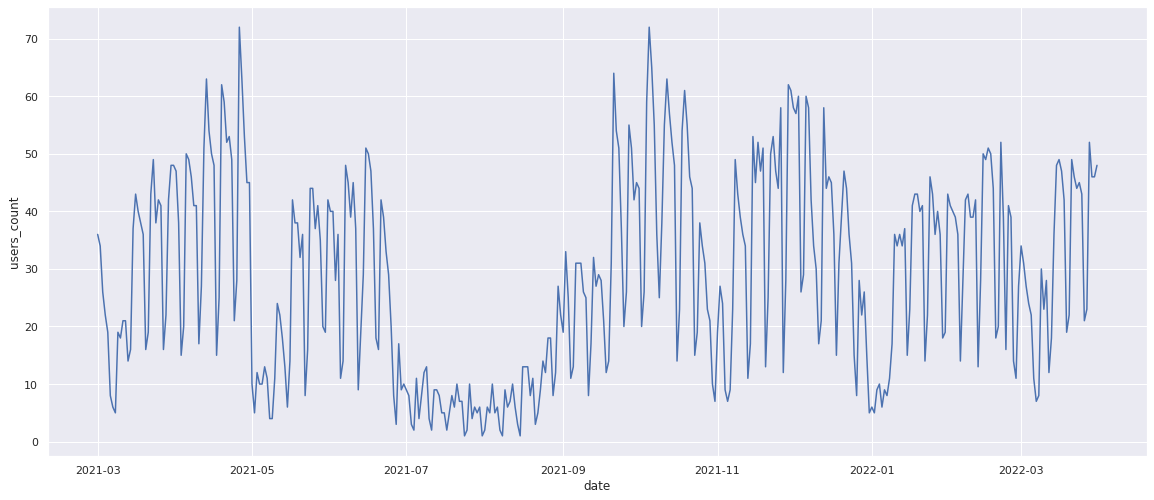

In [116]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Родитель" по метрикам: количество пользователей - "users_count" и степени вовлеченности
# пользователя - "sticky_factor"

# Из графика видно, что наибольшее количество "Родителей" - 72 человека наблюдалось 26 апреля и 5 октября 2021 года,
# а наименьшее - 1 человек в период второго и третьего месяца летних каникул 24, 31 июля и 8, 15 августа 2021 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=parent_user_dau);

In [117]:
parent_user_dau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role,sticky_factor
date,,,
2021-04-26,72,Родитель,0.600000
2021-10-05,72,Родитель,0.500000
2021-10-06,65,Родитель,0.451389
2021-09-21,64,Родитель,0.571429
2021-04-27,63,Родитель,0.525000
...,...,...,...
2021-08-07,2,Родитель,0.142857
2021-07-31,1,Родитель,0.076923
2021-08-15,1,Родитель,0.066667


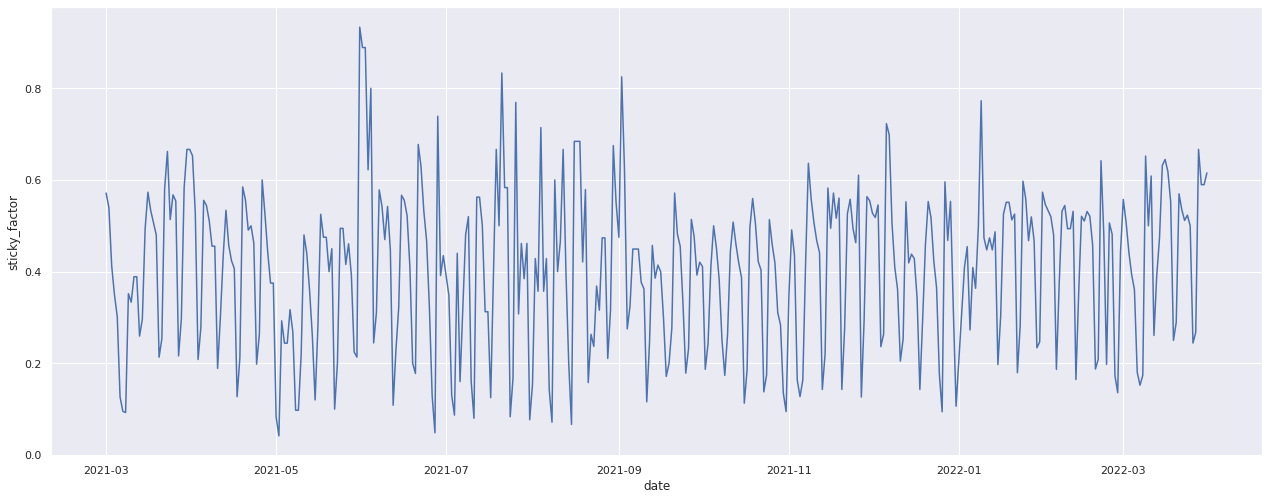

In [118]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(x="date", y="sticky_factor", data=parent_user_dau);

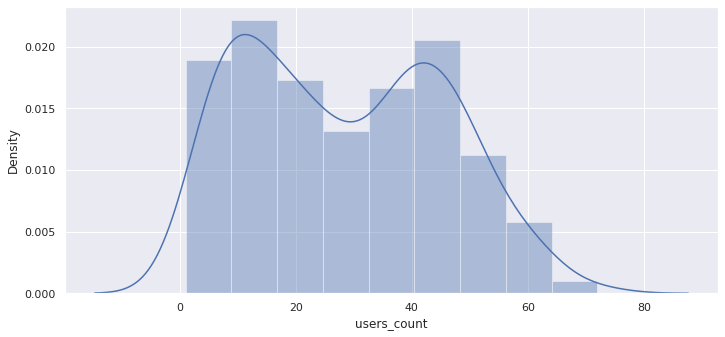

In [119]:
# Построим график плотности распределения по показателю количества пользователей - "users_count".

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(parent_user_dau.users_count);

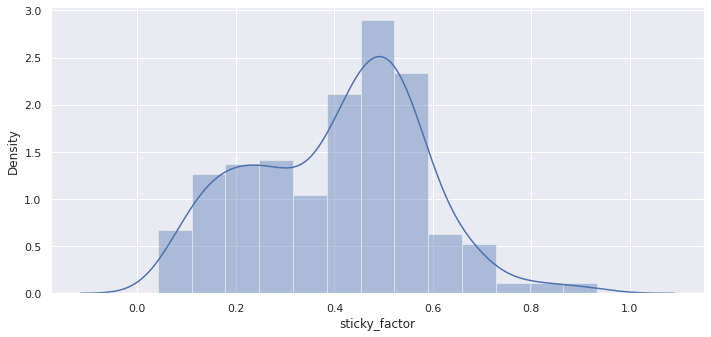

In [120]:
# Построим график плотности распределения по показателю степени вовлеченности пользователя - "sticky_factor".

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(parent_user_dau.sticky_factor);

In [121]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Ученик": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

student_user_dau = user_dau.query('user_role == "Ученик"')
student_user_dau.describe().round(3)

,users_count,sticky_factor
count,396.000,394.000
mean,3145.497,0.282
std,2051.677,0.110
min,139.000,0.059
25%,1498.750,0.202
50%,3144.500,0.277
75%,4633.000,0.350
max,14113.000,0.774


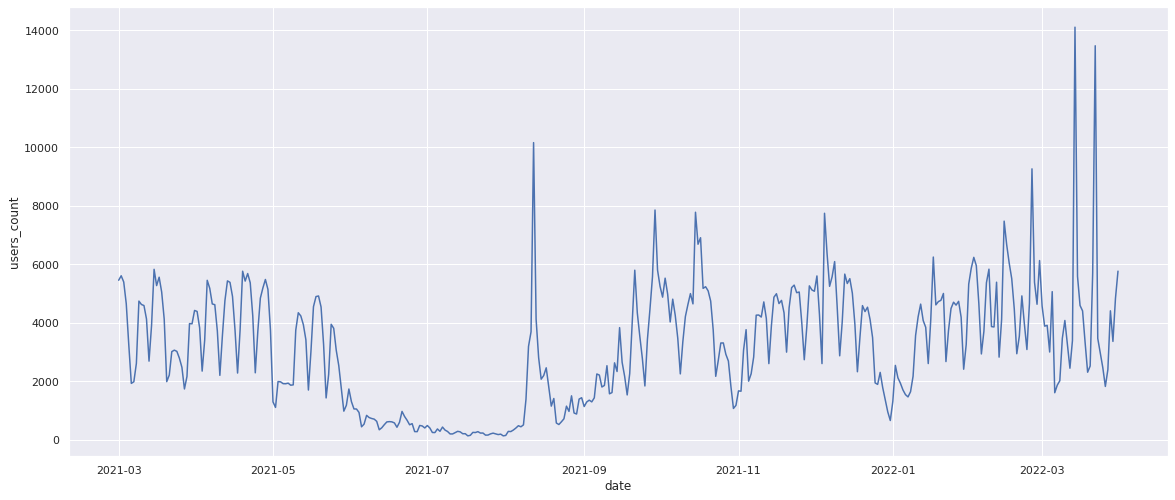

In [122]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Ученик" по метрикам: количество пользователей - "users_count" и степени вовлеченности
# пользователя - "sticky_factor"

# Из графика видно, что наибольшее количество "Учеников" - 14113 человек наблюдалось 14 марта 2022 года,
# а наименьшее - 139 человек в период второго месяца летних каникул 17, 31 июля 2021 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=student_user_dau);

In [123]:
student_user_dau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role,sticky_factor
date,,,
2022-03-14,14113,Ученик,0.581165
2022-03-22,13478,Ученик,0.576722
2021-08-12,10166,Ученик,0.430143
2022-02-25,9269,Ученик,0.406999
2021-09-29,7861,Ученик,0.283842
...,...,...,...
2021-07-24,164,Ученик,0.202719
2021-07-18,158,Ученик,0.200508
2021-08-01,154,Ученик,0.219373


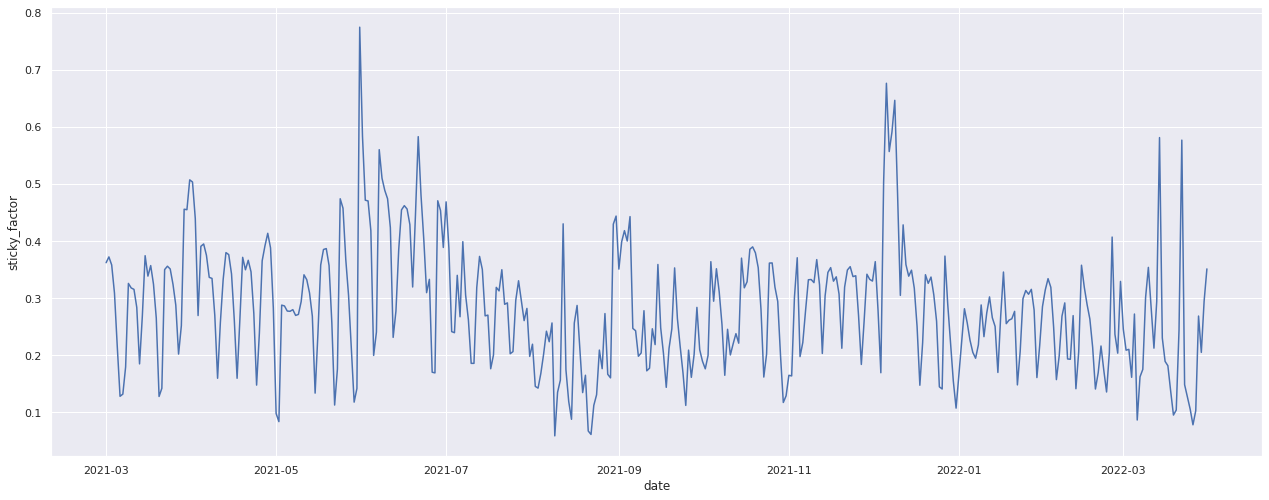

In [124]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(x="date", y="sticky_factor", data=student_user_dau);

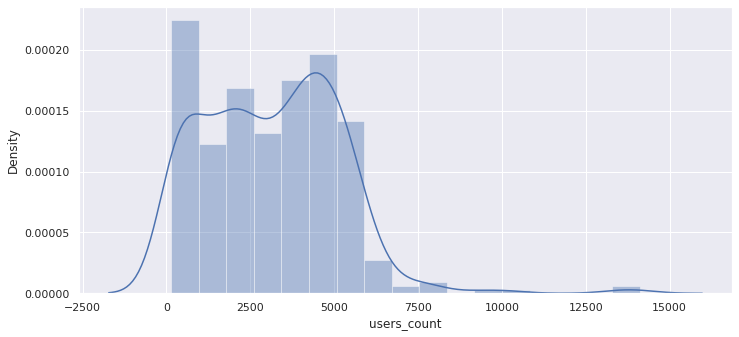

In [125]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(student_user_dau.users_count);

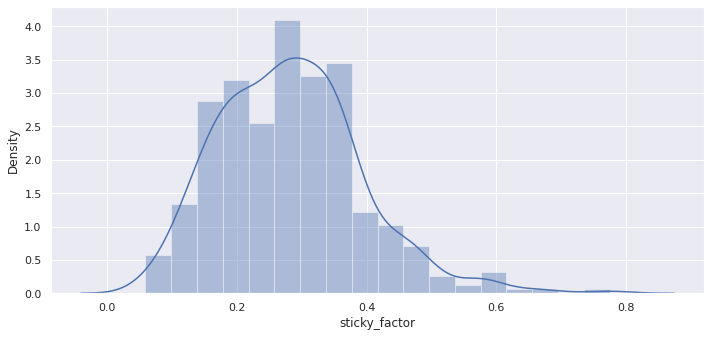

In [126]:
# Построим график плотности распределения по показателю степени вовлеченности пользователя - "sticky_factor"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(student_user_dau.sticky_factor);

In [127]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Учитель": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

teacher_user_dau = user_dau.query('user_role == "Учитель"')
teacher_user_dau.describe().round(3)

,users_count,sticky_factor
count,396.000,394.000
mean,879.702,0.309
std,656.437,0.111
min,39.000,0.053
25%,416.000,0.229
50%,686.500,0.318
75%,1142.750,0.383
max,4070.000,0.845


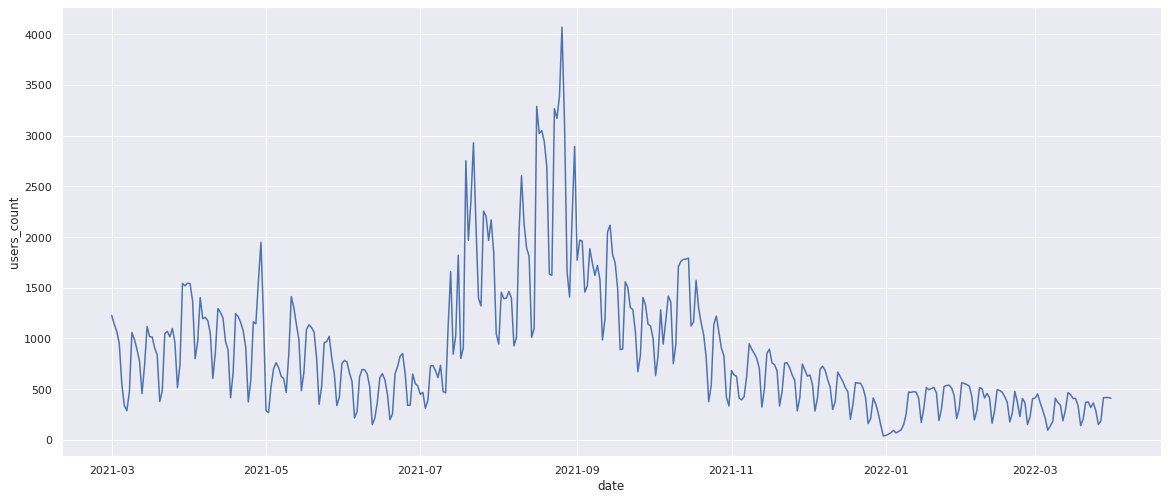

In [128]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Учитель" по метрикам: количество пользователей - "users_count" и степени вовлеченности
# пользователя - "sticky_factor"

# Из графика видно, что наибольшее количество "Учителей" - 4070 человек наблюдалось незадолго перед наступлением 
# нового учебного года 26 августа 2022 года, а наименьшее - 39 человек в периодзимних каникул - 31 декабря 2021 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=teacher_user_dau);

In [129]:
teacher_user_dau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role,sticky_factor
date,,,
2021-08-26,4070,Учитель,0.414840
2021-08-25,3391,Учитель,0.345632
2021-08-16,3289,Учитель,0.384364
2021-08-23,3266,Учитель,0.332892
2021-08-24,3170,Учитель,0.323107
...,...,...,...
2022-01-03,70,Учитель,0.235690
2022-01-05,68,Учитель,0.228956
2022-01-02,55,Учитель,NaN


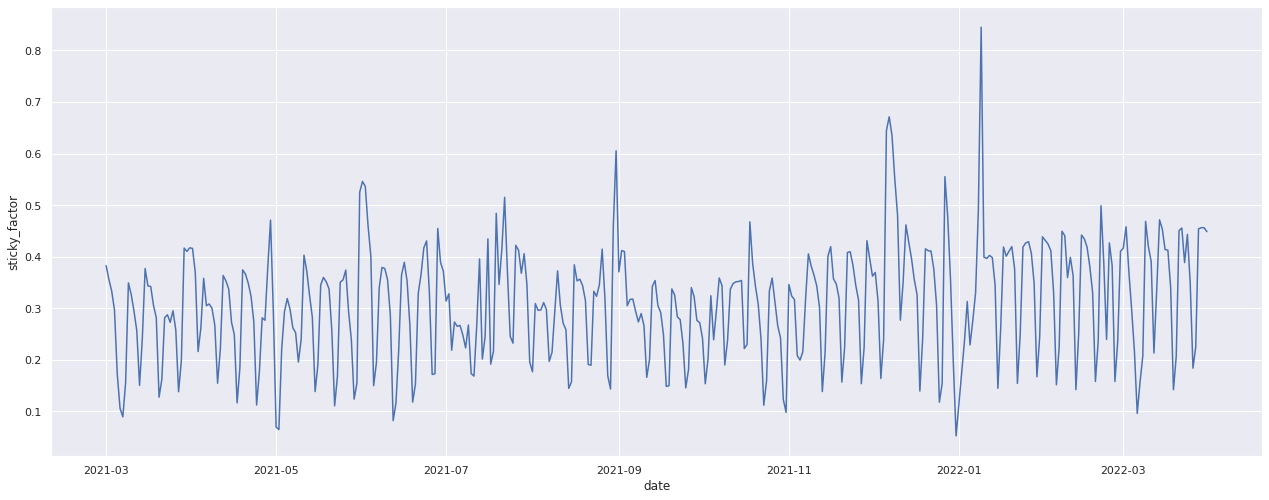

In [130]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(x="date", y="sticky_factor", data=teacher_user_dau);

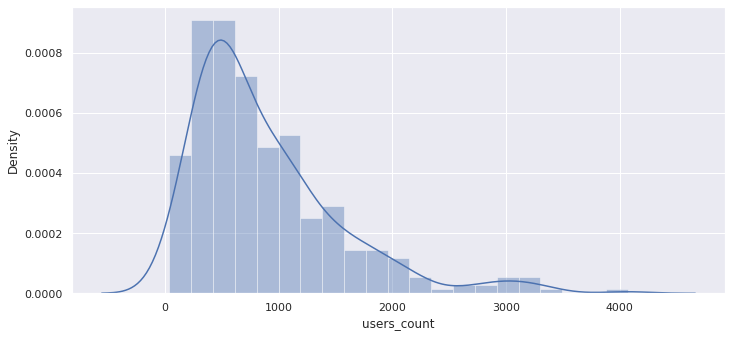

In [131]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(teacher_user_dau.users_count);

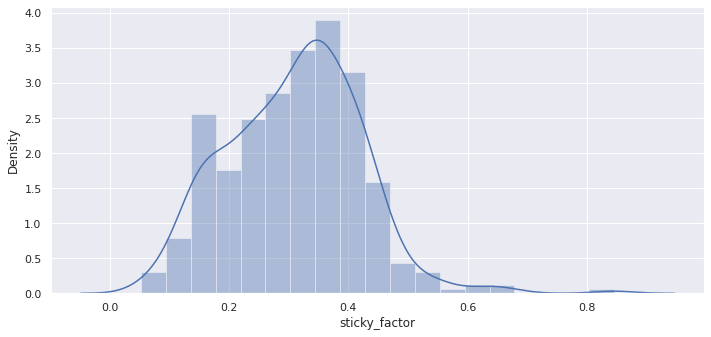

In [132]:
# Построим график плотности распределения по показателю степени вовлеченности пользователя - "sticky_factor"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(teacher_user_dau.sticky_factor);

In [133]:
# Выводим на экран полученный датафрейм "WAU" (при необходимости переименуем названия столбцов для удобства вычисления) 
# и проверим считанные типы данных

user_wau.rename(columns = {'full date-diapason':'date', 'Пользователи':'users_count', 'Тип пользователя':'user_role'}, inplace = True)
user_wau.head()

,date,users_count,user_role
0,21_09,831,Конфигуратор системы
1,21_09,63,Родитель
2,21_09,15079,Ученик
3,21_09,3209,Учитель
4,21_10,745,Конфигуратор системы


In [134]:
# Типы данных

user_wau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         224 non-null    object
 1   users_count  224 non-null    int64 
 2   user_role    224 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.4+ KB


In [135]:
# Размеры матрицы датафрейма "WAU" (количество строк и столбцов)

user_wau.shape

(224, 3)

In [136]:
# Минимальные значения по типу пользователей в неделю за весь рассматриваемый период времени

user_wau.groupby(['user_role']).min('users_count')

,users_count
user_role,
Конфигуратор системы,80
Родитель,12
Ученик,702
Учитель,297


In [137]:
# Максимальные значения по типу пользователей в неделю за весь рассматриваемый период времени

user_wau.groupby(['user_role']).max('users_count')

,users_count
user_role,
Конфигуратор системы,1249
Родитель,144
Ученик,27695
Учитель,9811


In [138]:
# Вычислим все описательные статистики нашей таблицы вне зависимости от типа пользователя: count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

user_wau.describe()

,users_count
count,224.000000
mean,3890.031250
std,5961.511952
min,12.000000
25%,139.000000
50%,955.000000
75%,4296.500000
max,27695.000000


In [139]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Конфигуратор системы": count - количество элементов, mean - выборочное среднее, 
# std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

config_user_wau = user_wau.query('user_role == "Конфигуратор системы"')
config_user_wau.describe()

,users_count
count,56.000000
mean,630.464286
std,259.106995
min,80.000000
25%,407.750000
50%,643.000000
75%,858.750000
max,1249.000000


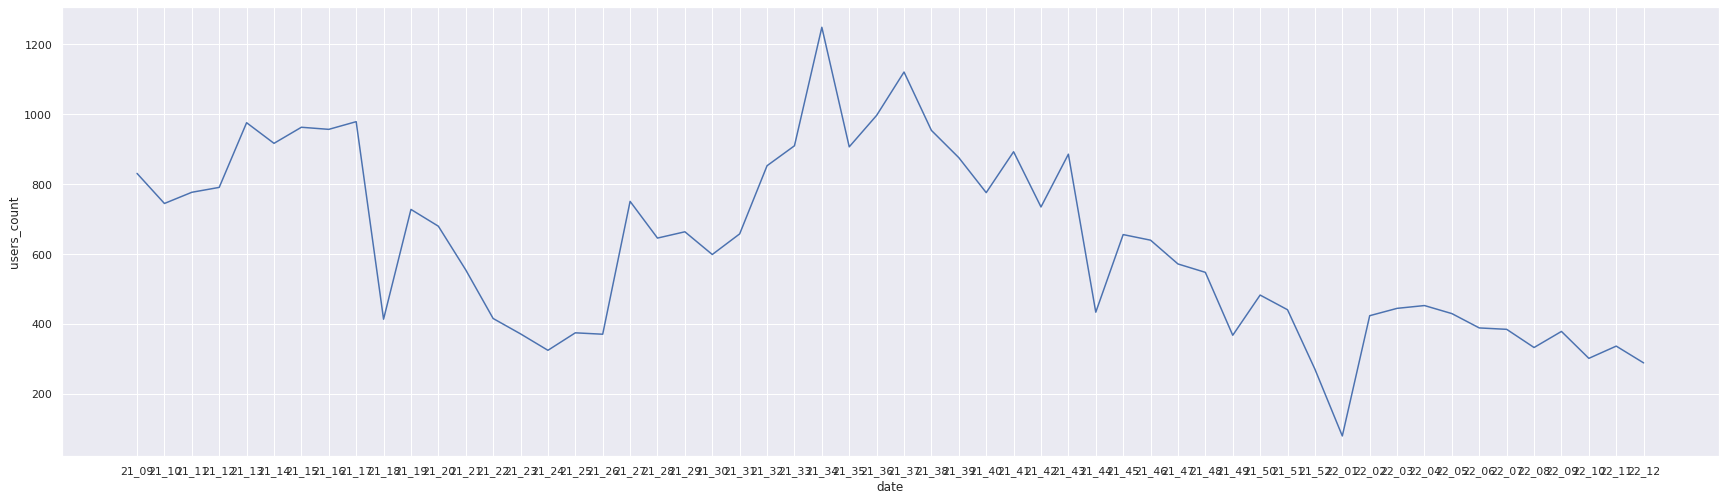

In [140]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Конфигуратор системы" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Конфигураторов системы" - 1249 человек наблюдалось перед началом 
# учебного года в период с 23 по 29 августа 2021 года (34-я неделя года - "2021_34"), 
# а наименьшее - 80 человек в период зимних каникул - с 3 по 9 января 2022 года (1-я неделя года - "2022_01")

sns.set(rc={'figure.figsize':(29.7,8.27)})
sns.lineplot(x="date", y="users_count", data=config_user_wau);

In [141]:
config_user_wau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
21_34,1249,Конфигуратор системы
21_37,1121,Конфигуратор системы
21_36,997,Конфигуратор системы
21_17,979,Конфигуратор системы
21_13,976,Конфигуратор системы
21_15,963,Конфигуратор системы
21_16,957,Конфигуратор системы
21_38,954,Конфигуратор системы
21_14,917,Конфигуратор системы


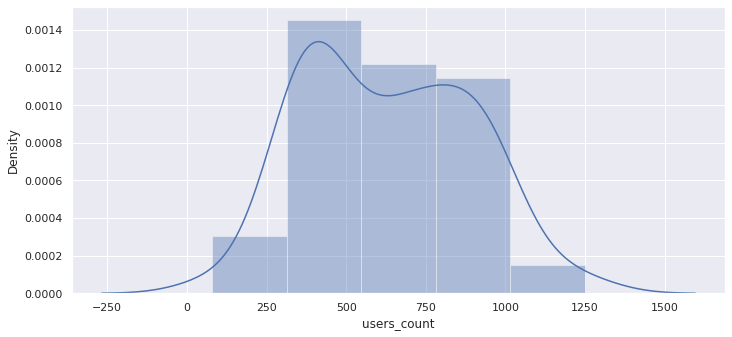

In [142]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(config_user_wau.users_count);

In [143]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Родитель": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

parent_user_wau = user_wau.query('user_role == "Родитель"')
parent_user_wau.describe()

,users_count
count,56.000000
mean,70.303571
std,32.110559
min,12.000000
25%,46.750000
50%,75.500000
75%,90.000000
max,144.000000


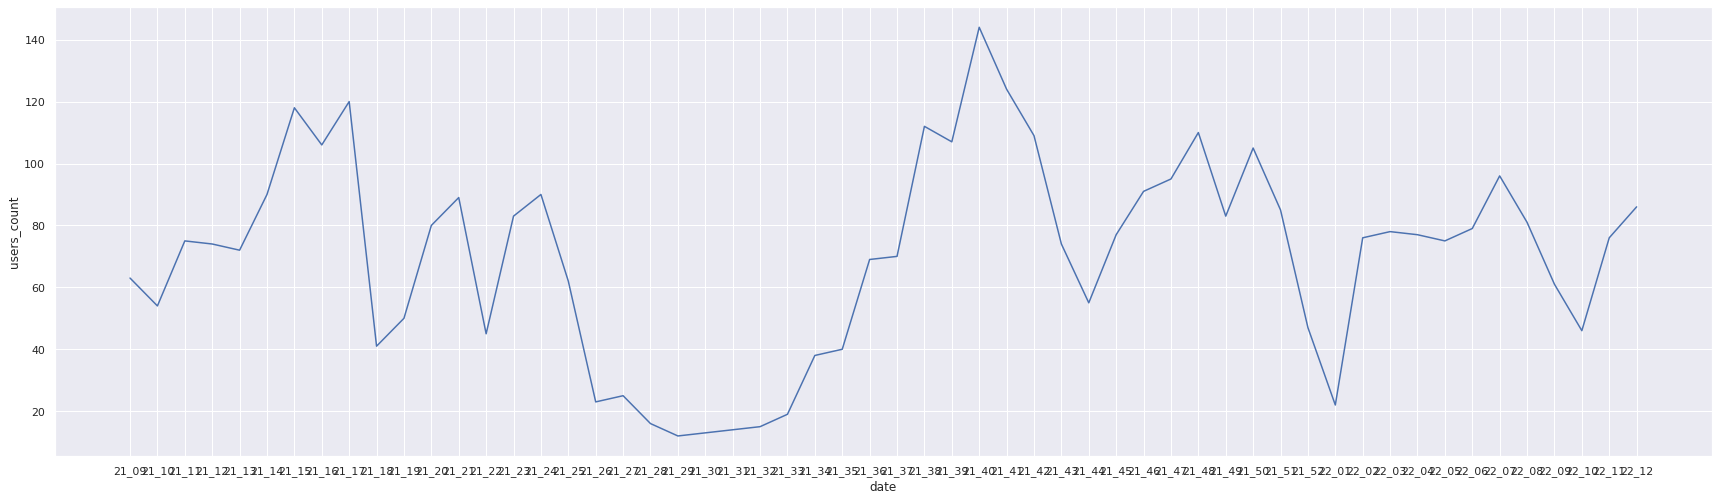

In [144]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Родитель" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Родителей" - 144 человека наблюдалось в период 
# с 4 по 10 октября 2021 года (40-я неделя года - "2021_40"), а наименьшее - 12 человек в период второго месяца летних каникул 
# с 19 по 25 июля 2021 года (29-я неделя года - "2021_29")

sns.set(rc={'figure.figsize':(29.7,8.27)})
sns.lineplot(x="date", y="users_count", data=parent_user_wau);

In [145]:
parent_user_wau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
21_40,144,Родитель
21_41,124,Родитель
21_17,120,Родитель
21_15,118,Родитель
21_38,112,Родитель
21_48,110,Родитель
21_42,109,Родитель
21_39,107,Родитель
21_16,106,Родитель


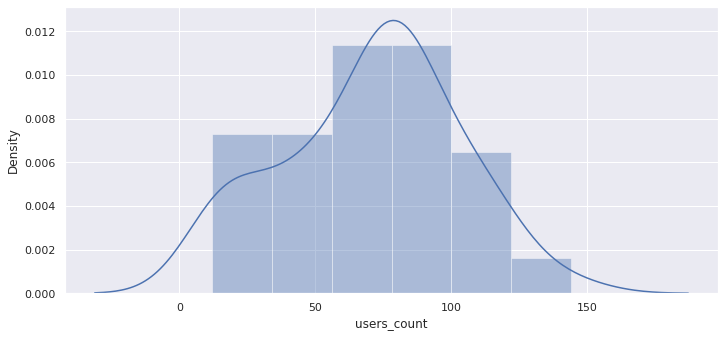

In [146]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(parent_user_wau.users_count);

In [147]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Ученик": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

student_user_wau = user_wau.query('user_role == "Ученик"')
student_user_wau.describe()

,users_count
count,56.000000
mean,11863.910714
std,6984.510895
min,702.000000
25%,7397.750000
50%,13052.500000
75%,15543.500000
max,27695.000000


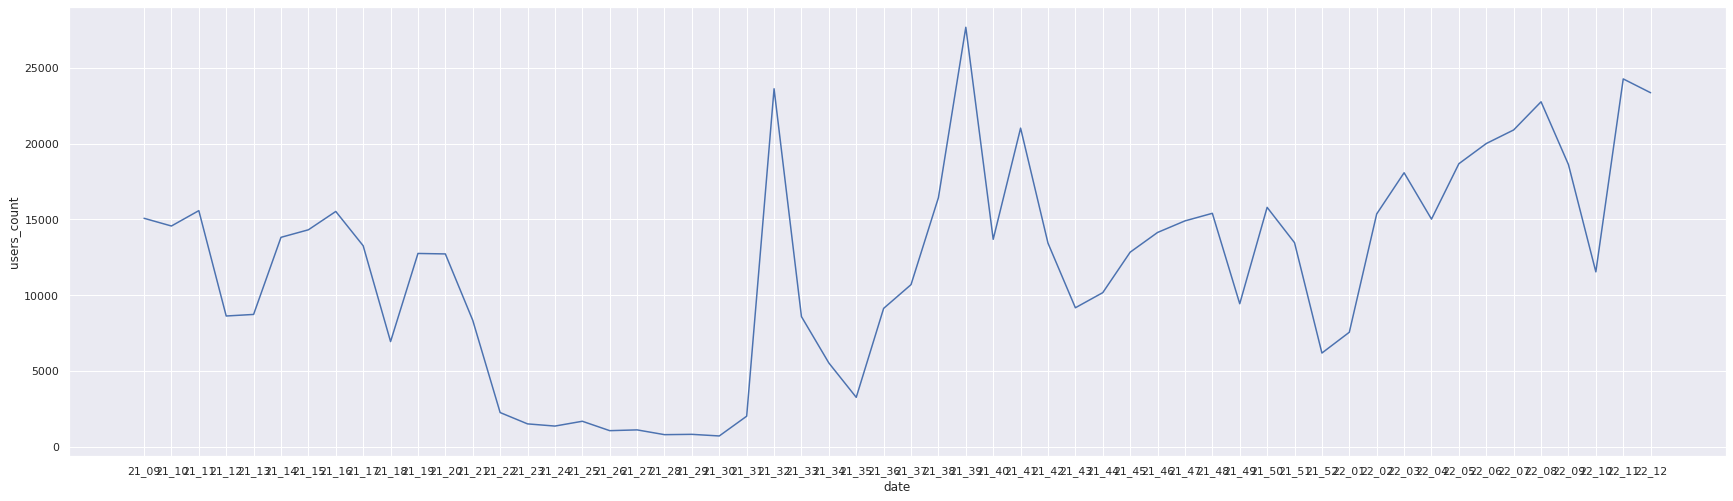

In [148]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Ученик" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Учеников" - 27695 человек наблюдалось в период с 27 сентября 
# по 3 октября 2021 года (39-я неделя года - "2021_39"), а наименьшее - 702 человека в период летних каникул 
# с 26 июля по 1 августа 2021 года (30-я неделя года - "2021_30")

sns.set(rc={'figure.figsize':(29.7,8.27)})
sns.lineplot(x="date", y="users_count", data=student_user_wau);

In [149]:
student_user_wau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
21_39,27695,Ученик
22_11,24284,Ученик
21_32,23634,Ученик
22_12,23370,Ученик
22_08,22774,Ученик
21_41,21034,Ученик
22_07,20914,Ученик
22_06,20016,Ученик
22_05,18683,Ученик


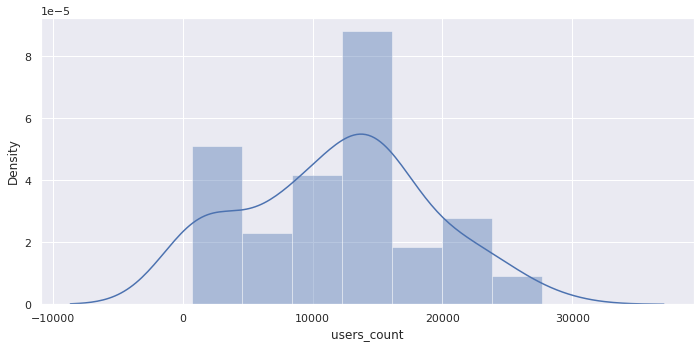

In [150]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(student_user_wau.users_count);

In [151]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Учитель": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

teacher_user_wau = user_wau.query('user_role == "Учитель"')
teacher_user_wau.describe()

,users_count
count,56.000000
mean,2995.446429
std,2004.563556
min,297.000000
25%,1340.000000
50%,2739.000000
75%,3996.000000
max,9811.000000


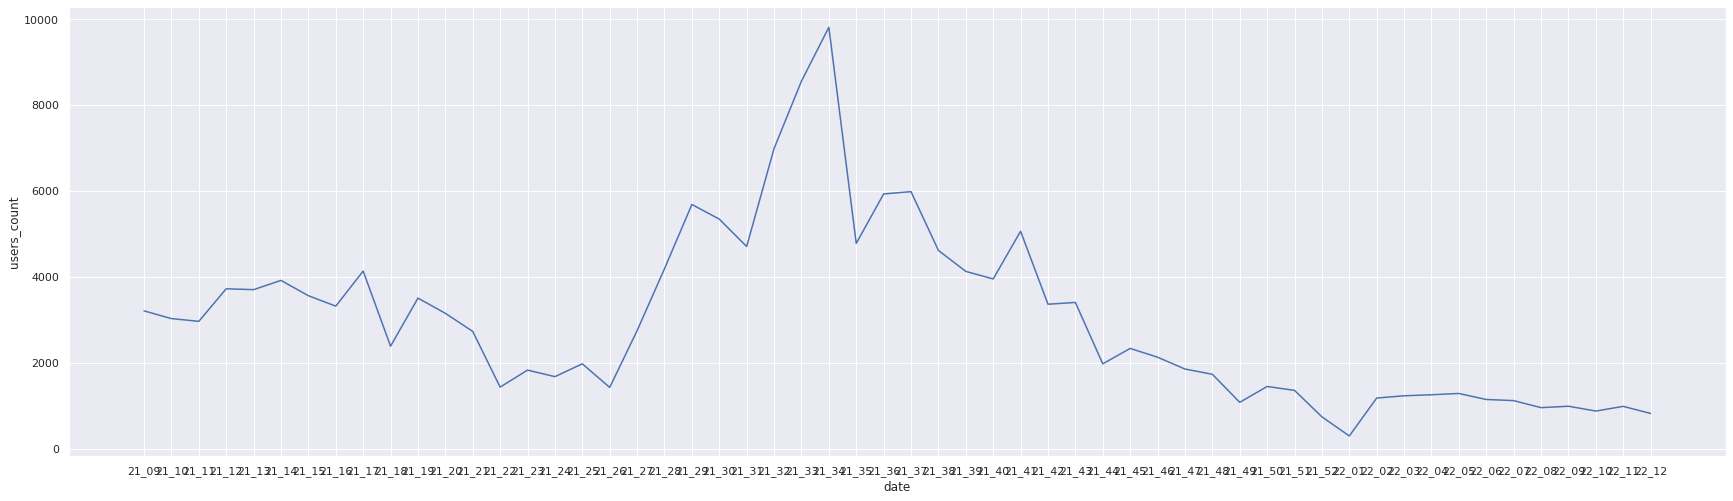

In [152]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Учитель" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Учителей" - 9811 человек наблюдалось в период начала нового учебного года
# с 23 по 29 августа 2021 года (34-я неделя года - "2021_34"), а наименьшее - 297 человек в период зимних каникул 
# с 3 по 9 января 2022 года (1-я неделя года - "2022_1")

sns.set(rc={'figure.figsize':(29.7,8.27)})
sns.lineplot(x="date", y="users_count", data=teacher_user_wau);

In [153]:
teacher_user_wau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
21_34,9811,Учитель
21_33,8557,Учитель
21_32,6989,Учитель
21_37,5984,Учитель
21_36,5931,Учитель
21_29,5686,Учитель
21_30,5345,Учитель
21_41,5063,Учитель
21_35,4780,Учитель


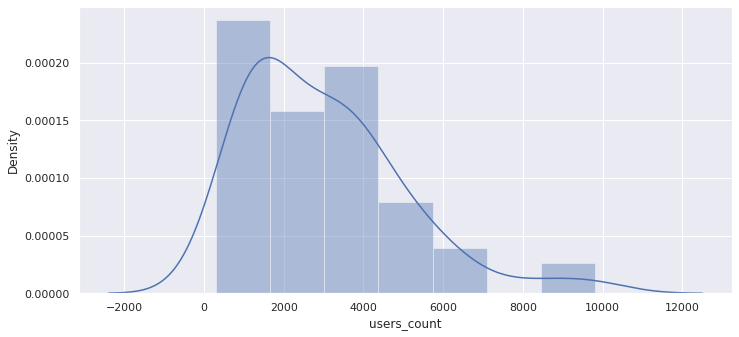

In [154]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(teacher_user_wau.users_count);

In [155]:
# Выводим на экран полученный датафрейм "MAU" (при необходимости переименуем названия столбцов для удобства вычисления) 
# и проверим считанные типы данных

user_mau.rename(columns = {'report_month':'date', 'Пользователи':'users_count', 'Тип пользователя':'user_role'}, inplace = True)
user_mau.head()

,date,users_count,user_role
0,2021-03-01,1695,Конфигуратор системы
1,2021-03-01,121,Родитель
2,2021-03-01,31645,Ученик
3,2021-03-01,8121,Учитель
4,2021-04-01,1989,Конфигуратор системы


In [156]:
# Типы данных

user_mau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         52 non-null     datetime64[ns]
 1   users_count  52 non-null     int64         
 2   user_role    52 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [157]:
# Размеры матрицы датафрейма "MAU" (количество строк и столбцов)

user_mau.shape

(52, 3)

In [158]:
# Минимальные значения по типу пользователей в месяц за весь рассматриваемый период времени

user_mau.groupby(['user_role']).min('users_count')

,users_count
user_role,
Конфигуратор системы,591
Родитель,35
Ученик,2435
Учитель,1926


In [159]:
# Максимальные значения по типу пользователей в месяц за весь рассматриваемый период времени

user_mau.groupby(['user_role']).max('users_count')

,users_count
user_role,
Конфигуратор системы,1989
Родитель,242
Ученик,68027
Учитель,15823


In [160]:
# Вычислим все описательные статистики нашей таблицы вне зависимости от типа пользователя: count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

user_mau.describe()

,users_count
count,52.000000
mean,11487.365385
std,18331.912872
min,35.000000
25%,503.750000
50%,1987.000000
75%,10313.500000
max,68027.000000


In [161]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Конфигуратор системы": count - количество элементов, mean - выборочное среднее, 
# std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

config_user_mau = user_mau.query('user_role == "Конфигуратор системы"')
config_user_mau.describe()

,users_count
count,13.000000
mean,1270.076923
std,524.891649
min,591.000000
25%,786.000000
50%,1203.000000
75%,1742.000000
max,1989.000000


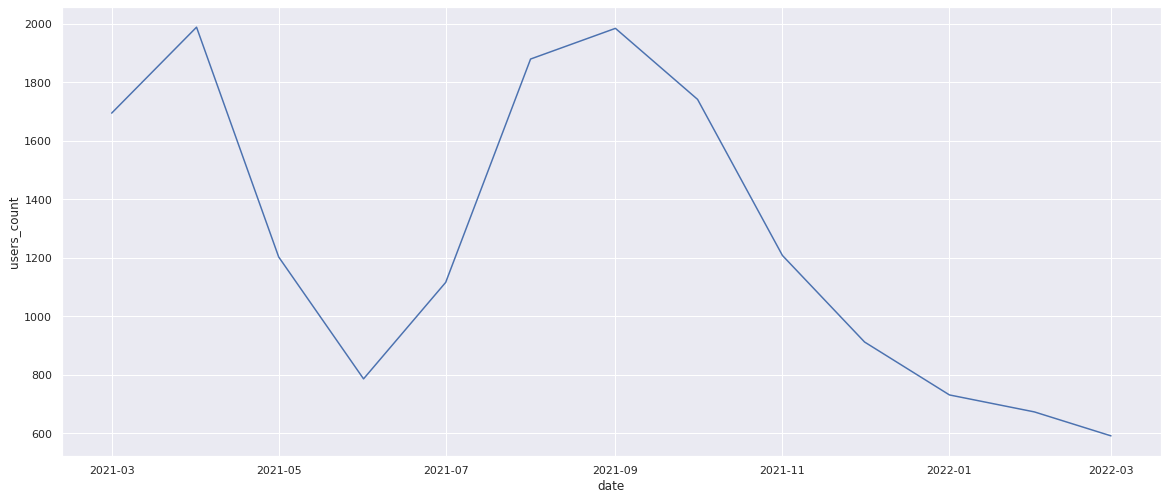

In [162]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Конфигуратор системы" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Конфигураторов системы" - 1989 и 1985 человек наблюдалось 1 апреля и 
# 1 сентября 2021 года, а наименьшее - 591 человек - 1 марта 2022 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=config_user_mau);

In [163]:
config_user_mau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
2021-04-01,1989,Конфигуратор системы
2021-09-01,1985,Конфигуратор системы
2021-08-01,1880,Конфигуратор системы
2021-10-01,1742,Конфигуратор системы
2021-03-01,1695,Конфигуратор системы
2021-11-01,1208,Конфигуратор системы
2021-05-01,1203,Конфигуратор системы
2021-07-01,1116,Конфигуратор системы
2021-12-01,912,Конфигуратор системы


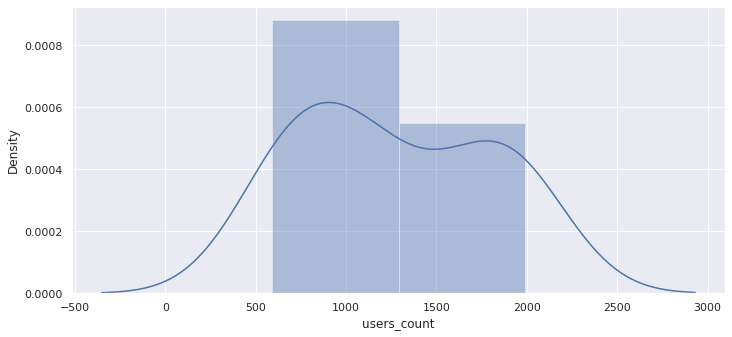

In [164]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(config_user_mau.users_count);

In [165]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Родитель": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

parent_user_mau = user_mau.query('user_role == "Родитель"')
parent_user_mau.describe()

,users_count
count,13.00000
mean,136.00000
std,54.58327
min,35.00000
25%,118.00000
50%,134.00000
75%,172.00000
max,242.00000


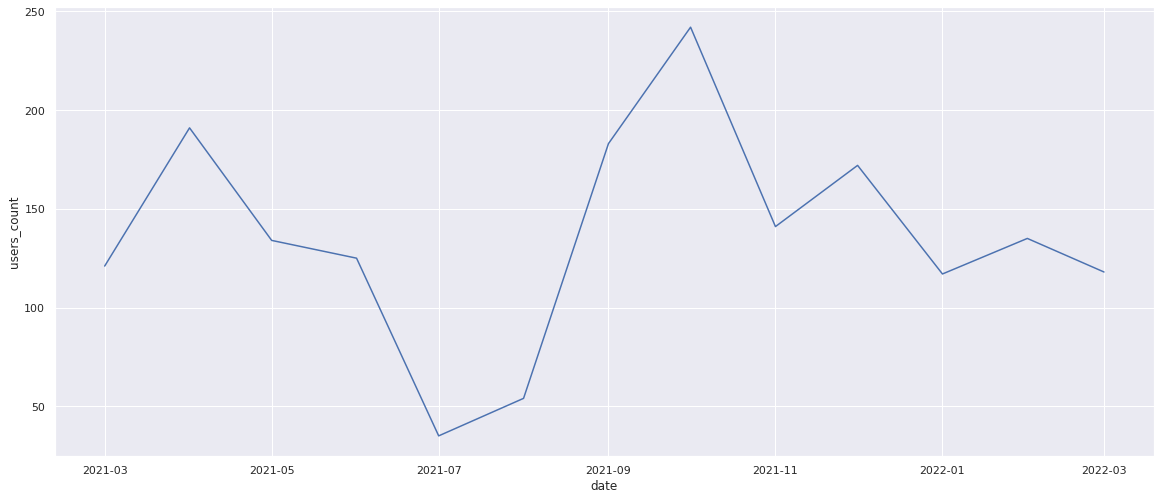

In [166]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Родитель" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Родителей" - 242 человека наблюдалось 1 октября 2021 года, 
# а наименьшее - 35 человек в период второго месяца летних каникул 1 июля 2021 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=parent_user_mau);

In [167]:
parent_user_mau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
2021-10-01,242,Родитель
2021-04-01,191,Родитель
2021-09-01,183,Родитель
2021-12-01,172,Родитель
2021-11-01,141,Родитель
2022-02-01,135,Родитель
2021-05-01,134,Родитель
2021-06-01,125,Родитель
2021-03-01,121,Родитель


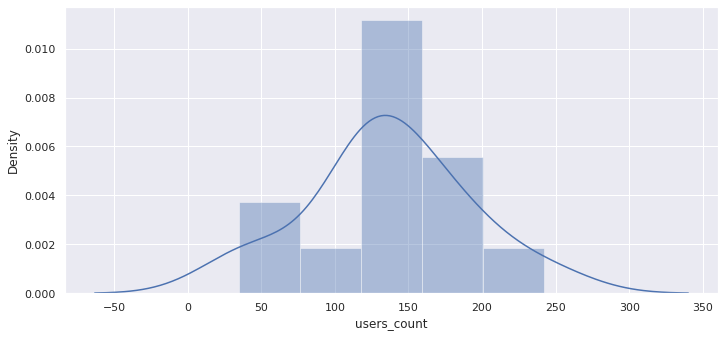

In [168]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(parent_user_mau.users_count);

In [169]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Ученик": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

student_user_mau = user_mau.query('user_role == "Ученик"')
student_user_mau.describe()

,users_count
count,13.000000
mean,37645.076923
std,19826.360884
min,2435.000000
25%,29695.000000
50%,38346.000000
75%,50160.000000
max,68027.000000


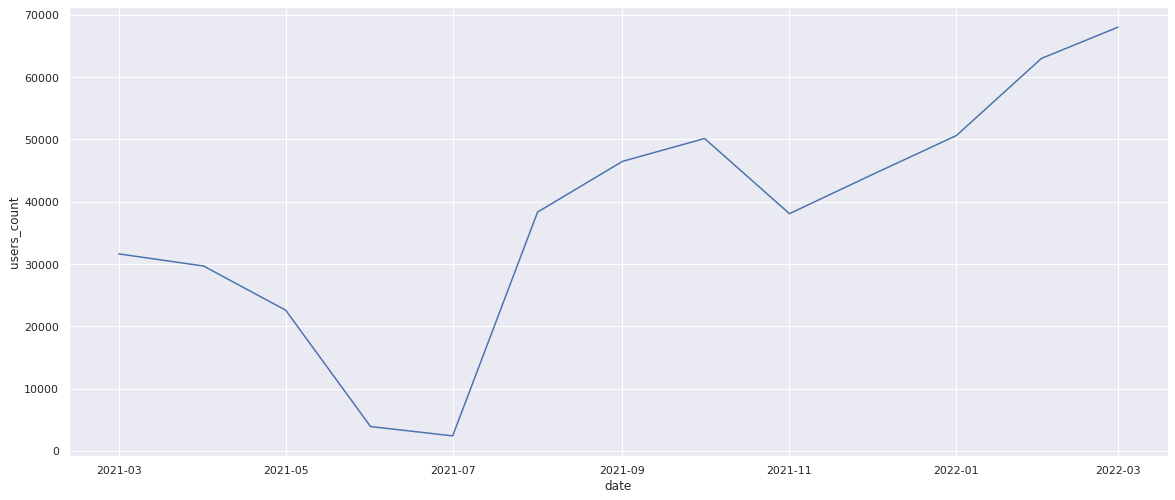

In [170]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Ученик" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Учеников" - 68027 человек наблюдалось 4 марта 2022 года,
# а наименьшее - 2435 человек в период второго месяца летних каникул 1 июля 2021 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=student_user_mau);

In [171]:
student_user_mau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
2022-03-01,68027,Ученик
2022-02-01,63003,Ученик
2022-01-01,50641,Ученик
2021-10-01,50160,Ученик
2021-09-01,46488,Ученик
2021-12-01,44317,Ученик
2021-08-01,38346,Ученик
2021-11-01,38095,Ученик
2021-03-01,31645,Ученик


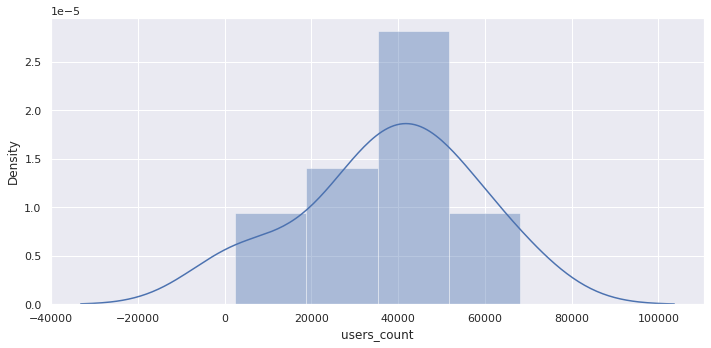

In [172]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(student_user_mau.users_count);

In [173]:
# Теперь выведем описательные статистики по роли/типу пользователя - "Учитель": count - количество элементов, 
# mean - выборочное среднее, std - выборочное среднеквадратическое отклонение, min/max - минимум/максимум, 25% квантиль, 
# 50% квантиль (медиана), 75% квантиль

teacher_user_mau = user_mau.query('user_role == "Учитель"')
teacher_user_mau.describe()

,users_count
count,13.000000
mean,6898.307692
std,4259.696280
min,1926.000000
25%,3310.000000
50%,6428.000000
75%,9594.000000
max,15823.000000


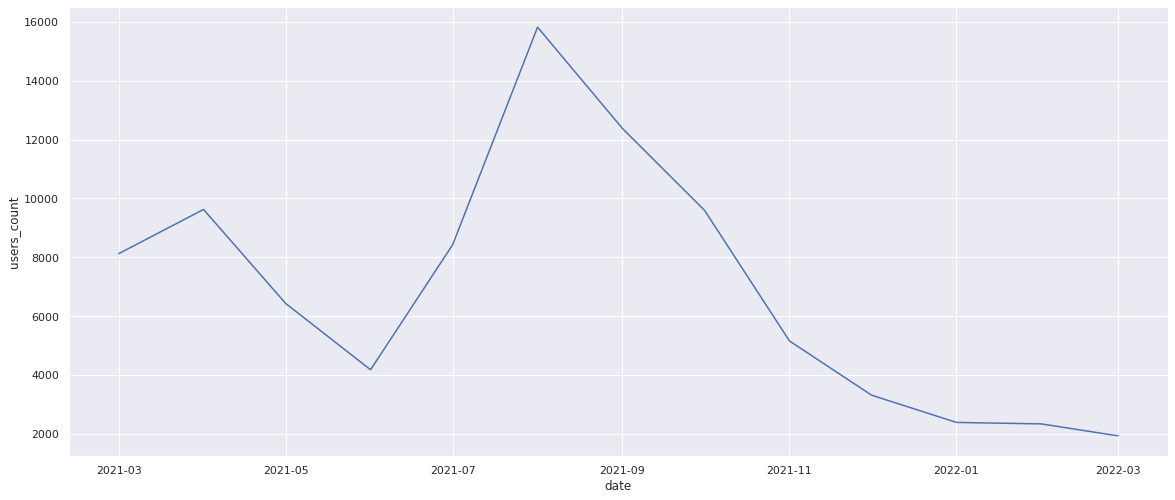

In [174]:
# Построим линейный график развития временной динамики (с данными по всем школам # с 1 марта 2021 г. и до 1 апреля 2022 г.)
# для типа пользователя - "Учитель" по количеству пользователей - "users_count"

# Из графика видно, что наибольшее количество "Учителей" - 15823 человек наблюдалось в третий месяц 
# летних каникул 1 августа 2021 года, а наименьшее - 1926 человек - 1 марта 2022 года

sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.lineplot(x="date", y="users_count", data=teacher_user_mau);

In [175]:
teacher_user_mau.groupby(['date']).min().sort_values(by='users_count', ascending=False)

,users_count,user_role
date,,
2021-08-01,15823,Учитель
2021-09-01,12379,Учитель
2021-04-01,9625,Учитель
2021-10-01,9594,Учитель
2021-07-01,8428,Учитель
2021-03-01,8121,Учитель
2021-05-01,6428,Учитель
2021-11-01,5154,Учитель
2021-06-01,4174,Учитель


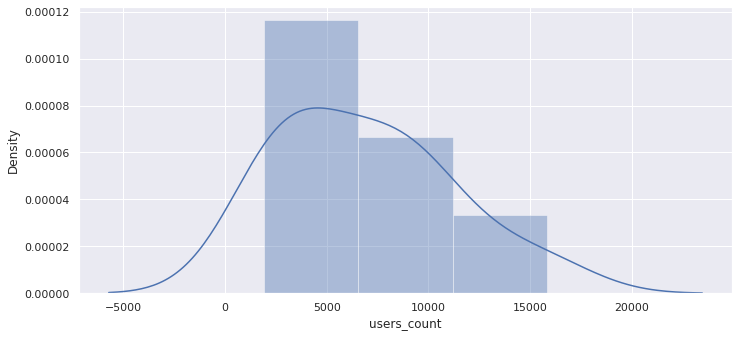

In [176]:
# Построим график плотности распределения по показателю количества пользователей - "users_count"

sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.distplot(teacher_user_mau.users_count);